In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
df = pd.read_csv('https://query.data.world/s/4rc3ue7y43lgazmy44xhxpn32mfujo')

In [3]:
df.head(3)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909


In [4]:
df['FoodGroup'].value_counts()

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [6]:
df_new = pd.read_excel('https://query.data.world/s/twh3fzbktso2x5z5dlr7yal2ntdfks')
df_new.head(3)

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.8,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.8,1 tbsp,205.0,1 cup,0.0


In [7]:
#merge the both DF's 
final_df = pd.merge(left=df[['ID', 'FoodGroup', 'CommonName','Fat_g']], 
                    right=df_new,
                    left_on = 'ID',
                    right_on ='NDB_No', 
                    how='right').drop(columns='ID')

In [8]:
final_df.isna().sum()

FoodGroup             371
CommonName           7741
Fat_g                 371
NDB_No                  0
Shrt_Desc               0
Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
#simple impute the missing data with the most frequent
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp.fit(final_df)

SimpleImputer(strategy='most_frequent')

In [11]:
#assign to new df
final_df = pd.DataFrame(imp.transform(final_df),columns=final_df.columns)

In [12]:
final_df.head()

,FoodGroup,CommonName,Fat_g,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,Dairy and Egg Products,hamburger,81.11,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,...,7.0,51.368,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,Dairy and Egg Products,hamburger,81.11,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.3,1.62,...,4.6,45.39,19.874,3.331,225.0,3.8,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,Dairy and Egg Products,hamburger,99.48,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.0,...,8.6,61.924,28.732,3.694,256.0,12.8,1 tbsp,205.0,1 cup,0.0
3,Dairy and Egg Products,hamburger,28.74,1004,"CHEESE,BLUE",42.41,353,21.4,28.74,5.11,...,2.4,18.669,7.778,0.8,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,Dairy and Egg Products,hamburger,29.68,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,...,2.5,18.764,8.598,0.784,94.0,132.0,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [13]:
#create a function that takes the values for each row and computes daily value of foods
#https://www.canada.ca/en/health-canada/services/understanding-food-labels/percent-daily-value.html
def findDV(df):
    fat_g = (df['Fat_g']/65)
    sat_trans_fat = (df['FA_Sat_(g)']/20)
    cholesterol  = ((df['Cholestrl_(mg)']/300)/1_000)
    sodium = ((df['Sodium_(mg)']/1_000)/2400)
    carbs = (df['Carbohydrt_(g)']/300)
    fiber = (df['Fiber_TD_(g)']/25)
    #Sugars = df['Sugar_Tot_(g)'] #no div
    #protiern #no dif
    protein = (df['Protein_(g)']/11)
    vitA = ((df['Vit_A_RAE']/1_000)/1_000_000)
    vitC = ((df['Vit_C_(mg)']/1_000)/60)
    calcium = ((df['Calcium_(mg)']/1100)/1_000)
    iron = ((df['Iron_(mg)']/14)/1_000)
    
    Nscore = []
    for i in range(len(fat_g)):
        dv = protein[i]+fat_g[i]+sat_trans_fat[i]+cholesterol[i]+sodium[i]+carbs[i]+fiber[i]+vitA[i]+vitC[i]+calcium[i]+iron[i]
        Nscore.append(round(dv))
    return(Nscore)


In [14]:
dv = findDV(final_df)
np.mean(dv)

1.4675767918088738

In [15]:
max(dv)

8

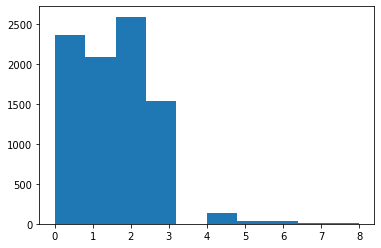

In [16]:
plt.hist(dv);

In [17]:
#assign the Nutrient Densities to each score
final_df['Daily Values'] = dv

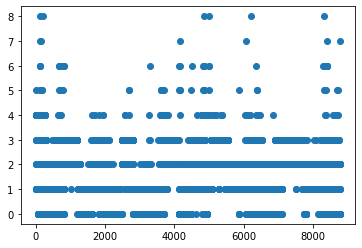

In [18]:
#plot scatter of scores
plt.scatter(range(len(dv)),dv)

In [19]:
#score each of the food groups manually
final_df.loc[final_df['FoodGroup'] == 'Dairy and Egg Products', 'storage'] = 1
final_df.loc[final_df['FoodGroup'] == 'Spices and Herbs', 'storage'] = 5
final_df.loc[final_df['FoodGroup'] == 'Baby Foods', 'storage'] = 3
final_df.loc[final_df['FoodGroup'] == 'Fats and Oils', 'storage'] = 5
final_df.loc[final_df['FoodGroup'] == 'Poultry Products', 'storage'] = 1
final_df.loc[final_df['FoodGroup'] == 'Soups, Sauces, and Gravies', 'storage'] = 4
final_df.loc[final_df['FoodGroup'] == 'Sausages and Luncheon Meats', 'storage'] = 2
final_df.loc[final_df['FoodGroup'] == 'Breakfast Cereals', 'storage'] = 10
final_df.loc[final_df['FoodGroup'] == 'Fruits and Fruit Juices', 'storage'] = 4
final_df.loc[final_df['FoodGroup'] == 'Pork Products', 'storage'] = 2
final_df.loc[final_df['FoodGroup'] == 'Vegetables and Vegetable Products', 'storage'] = 3
final_df.loc[final_df['FoodGroup'] == 'Nut and Seed Products', 'storage'] = 10
final_df.loc[final_df['FoodGroup'] == 'Beef Products', 'storage'] = 2
final_df.loc[final_df['FoodGroup'] == 'Beverages', 'storage'] = 10
final_df.loc[final_df['FoodGroup'] == 'Finfish and Shellfish Products', 'storage'] = 1
final_df.loc[final_df['FoodGroup'] == 'Legumes and Legume Products', 'storage'] = 9
final_df.loc[final_df['FoodGroup'] == 'Lamb, Veal, and Game Products', 'storage'] = 2
final_df.loc[final_df['FoodGroup'] == 'Baked Products', 'storage'] = 5
final_df.loc[final_df['FoodGroup'] == 'Sweets', 'storage'] = 10
final_df.loc[final_df['FoodGroup'] == 'Cereal Grains and Pasta', 'storage'] = 10
final_df.loc[final_df['FoodGroup'] == 'Fast Foods', 'storage'] = 1
final_df.loc[final_df['FoodGroup'] == 'Meals, Entrees, and Side Dishes', 'storage'] = 2
final_df.loc[final_df['FoodGroup'] == 'Snacks', 'storage'] = 9
final_df.loc[final_df['FoodGroup'] == 'American Indian/Alaska Native Foods', 'storage'] = 3
final_df.loc[final_df['FoodGroup'] == 'Restaurant Foods', 'storage'] = 1

In [20]:
final_df['Daily Values'].value_counts()

2    2587
0    2363
1    2083
3    1540
4     131
6      39
5      35
8       6
7       6
Name: Daily Values, dtype: int64

In [21]:
final_df['Daily Values'].max() #8
final_df['Daily Values'].min() #0

final_df['storage'].min() #1
final_df['storage'].max() #10

10.0

In [22]:
final_df['score'] = final_df['Daily Values'] + final_df['storage'] 

In [23]:
final_df['log_score'] = np.log(final_df['Daily Values'] + final_df['storage'] )

In [24]:
final_df.head(2)

,FoodGroup,CommonName,Fat_g,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),...,Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,Daily Values,storage,score,log_score
0,Dairy and Egg Products,hamburger,81.11,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,...,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,4,1.0,5.0,1.609438
1,Dairy and Egg Products,hamburger,81.11,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.3,1.62,...,225.0,3.8,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,4,1.0,5.0,1.609438


<AxesSubplot:>

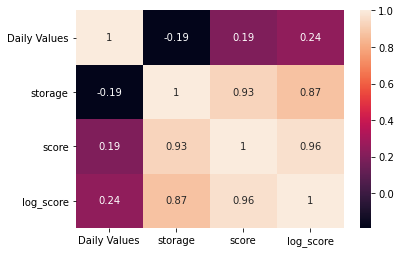

In [25]:
sns.heatmap(final_df.corr(),annot = True)

In [26]:
final_df['score'].mean() #5.639476678043231
final_df['log_score'].mean() #1.5923

1.5923169733457856

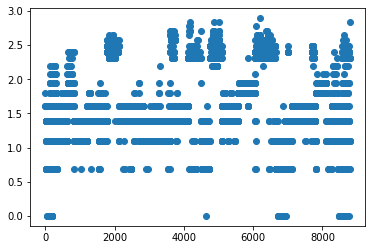

In [27]:
plt.scatter(range(len(final_df['score'])),final_df['log_score'])

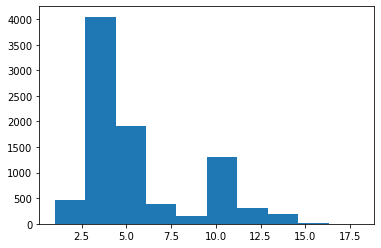

In [28]:
plt.hist(final_df['score']);

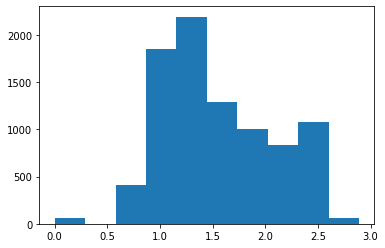

In [29]:
plt.hist(np.log(final_df['score']));

In [30]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline  import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [31]:
X = final_df.drop(columns=['score','log_score'], axis =1 )
X = final_df[['FoodGroup','Fat_g','FA_Sat_(g)','Sodium_(mg)','Carbohydrt_(g)','Fiber_TD_(g)','Protein_(g)','Vit_A_RAE','Vit_C_(mg)','Calcium_(mg)','Iron_(mg)']]
X = final_df[['Fat_g','FA_Sat_(g)','Sodium_(mg)','Carbohydrt_(g)','Fiber_TD_(g)','Protein_(g)','Vit_A_RAE','Vit_C_(mg)','Calcium_(mg)','Iron_(mg)']]
y = final_df['log_score']

In [32]:
mean_squared_error(y, np.full_like(y,final_df['log_score'].mean()))

0.269086627638223

In [33]:
X.head(2)

,Fat_g,FA_Sat_(g),Sodium_(mg),Carbohydrt_(g),Fiber_TD_(g),Protein_(g),Vit_A_RAE,Vit_C_(mg),Calcium_(mg),Iron_(mg)
0,81.11,51.368,643.0,0.06,0.0,0.85,684.0,0.0,24.0,0.02
1,81.11,45.39,583.0,2.87,0.0,0.49,683.0,0.0,23.0,0.05


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=518)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6592 entries, 7472 to 2773
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fat_g           6592 non-null   object
 1   FA_Sat_(g)      6592 non-null   object
 2   Sodium_(mg)     6592 non-null   object
 3   Carbohydrt_(g)  6592 non-null   object
 4   Fiber_TD_(g)    6592 non-null   object
 5   Protein_(g)     6592 non-null   object
 6   Vit_A_RAE       6592 non-null   object
 7   Vit_C_(mg)      6592 non-null   object
 8   Calcium_(mg)    6592 non-null   object
 9   Iron_(mg)       6592 non-null   object
dtypes: object(10)
memory usage: 566.5+ KB


In [36]:
# ct = make_column_transformer(
# ...       (StandardScaler(),
# ...        make_column_selector(dtype_include=np.number)),  # rating
# ...       (OneHotEncoder(),
# ...        make_column_selector(dtype_include=object)))  # city

#trans_col = make_column_transformer((OneHotEncoder(use_cat_names=True), make_column_selector('FoodGroup')) )
                                   

pipe_lr = make_pipeline(#trans_col,
                        StandardScaler(),
                       LinearRegression())

In [37]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [38]:
pipe_lr.score(X_train,y_train)

0.34623655274208676

In [39]:
pipe_lr.score(X_test,y_test)

0.33754059002171954

In [40]:
X = final_df[['FoodGroup','Fat_g','FA_Sat_(g)','Sodium_(mg)','Carbohydrt_(g)','Fiber_TD_(g)','Protein_(g)','Vit_A_RAE','Vit_C_(mg)','Calcium_(mg)','Iron_(mg)']]
y = final_df['log_score']

In [41]:
X.head(2)

,FoodGroup,Fat_g,FA_Sat_(g),Sodium_(mg),Carbohydrt_(g),Fiber_TD_(g),Protein_(g),Vit_A_RAE,Vit_C_(mg),Calcium_(mg),Iron_(mg)
0,Dairy and Egg Products,81.11,51.368,643.0,0.06,0.0,0.85,684.0,0.0,24.0,0.02
1,Dairy and Egg Products,81.11,45.39,583.0,2.87,0.0,0.49,683.0,0.0,23.0,0.05


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=518)

In [43]:
trans_col = make_column_transformer((OneHotEncoder(use_cat_names=True), make_column_selector('FoodGroup')) )
                                   

pipe_lr = make_pipeline(trans_col,
                        StandardScaler(),
                       LinearRegression())

In [44]:
pipe_lr.fit(X_train,y_train)

/Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(use_cat_names=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcb5b1e9880>)])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [45]:
pipe_lr.score(X_train,y_train)

0.8533444254215866

In [46]:
pipe_lr.score(X_test,y_test)

0.848902651236388

In [47]:
X = final_df[['FoodGroup']]
y = final_df['log_score']

In [48]:
X.head(2)

,FoodGroup
0,Dairy and Egg Products
1,Dairy and Egg Products


In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=518)

In [50]:
trans_col = make_column_transformer((OneHotEncoder(use_cat_names=True), make_column_selector('FoodGroup')) )
                                   

pipe_lr = make_pipeline(trans_col,
                        StandardScaler(),
                       LinearRegression())

In [51]:
pipe_lr.fit(X_train,y_train)

/Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(use_cat_names=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcb5beb4760>)])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [52]:
pipe_lr.score(X_train,y_train)

0.8533444254215866

In [53]:
pipe_lr.score(X_test,y_test)

0.848902651236388

In [54]:
X = final_df[['Shrt_Desc']]
y = final_df['log_score']
X.head(2)

,Shrt_Desc
0,"BUTTER,WITH SALT"
1,"BUTTER,WHIPPED,W/ SALT"


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=518)

In [56]:
trans_col = make_column_transformer((OneHotEncoder(use_cat_names=True), make_column_selector('Shrt_Desc')) )
                                   

pipe_lr = make_pipeline(trans_col,
                        StandardScaler(),
                       LinearRegression())

In [57]:
pipe_lr.fit(X_train,y_train)

/Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(use_cat_names=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcb5bec3550>)])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [58]:
pipe_lr.score(X_train,y_train)

1.0

In [59]:
pipe_lr.score(X_test,y_test)

0.00026456568272459347

In [ ]:
#top_layer.save('saved_model/my_top_model')

In [60]:
pipe_lr.save('pipe_model/my_top_model')

pipe_lr['linearregression']#.save('lr_model/my_bottom_model')


import joblib

In [70]:
joblib.dump(pipe_lr['linearregression'], 'filename.pkl')

['filename.pkl']

In [71]:
X = final_df[['FoodGroup']]
y = final_df['log_score']

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=518)

In [73]:
ohe = OneHotEncoder(use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

/Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [74]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_ohe)
X_test_sc = ss.transform(X_test_ohe)

In [75]:
lr = LinearRegression()
lr.fit(X_train_sc,y_train)


LinearRegression()

In [76]:
lr.score(X_train_sc,y_train)

0.8533444254215866

In [78]:
lr.score(X_test_sc,y_test)

0.848902651236388

In [80]:
pd.to_pickle(lr,'./dummy.pkl')